In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [15]:
df=pd.read_csv("https://github.com/pcm-dpc/COVID-19/raw/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv")
#x=pd.to_numeric(range(df.shape[0]))
df.tail()

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,note
282,2020-12-02T17:00:00,ITA,32454,3616,36070,725160,761230,-18715,20709,823335,57045,988470.0,653140.0,1641610,22334342,13167345.0,NaN
283,2020-12-03T17:00:00,ITA,31772,3597,35369,724613,759982,-1248,23225,846809,58038,0.0,0.0,1664829,22554389,13264937.0,NaN
284,2020-12-04T17:00:00,ITA,31200,3567,34767,722935,757702,-2280,24099,872385,58852,0.0,0.0,1688939,22767130,13348068.0,NaN
285,2020-12-05T17:00:00,ITA,30158,3517,33675,720494,754169,-3533,21052,896308,59514,0.0,0.0,1709991,22962114,13435624.0,NaN
286,2020-12-06T17:00:00,ITA,30391,3454,33845,721461,755306,1137,18887,913494,60078,0.0,0.0,1728878,23125664,13510154.0,NaN


In [16]:
df.dtypes

data                             object
stato                            object
ricoverati_con_sintomi            int64
terapia_intensiva                 int64
totale_ospedalizzati              int64
isolamento_domiciliare            int64
totale_positivi                   int64
variazione_totale_positivi        int64
nuovi_positivi                    int64
dimessi_guariti                   int64
deceduti                          int64
casi_da_sospetto_diagnostico    float64
casi_da_screening               float64
totale_casi                       int64
tamponi                           int64
casi_testati                    float64
note                             object
dtype: object

In [17]:
data2=pd.to_datetime(df['data'])

In [18]:
data3=data2.dt.date

In [19]:
nuovi_deceduti=np.array(df['deceduti'])
nuovi_deceduti=np.diff(df['deceduti'])
nuovi_deceduti=np.append(0,nuovi_deceduti)
nuovi_deceduti
#nuovi_deceduti=df['nuovi_deceduti']

array([  0,   3,   2,   5,   4,   8,   5,  18,  27,  28,  41,  49,  36,
       133,  97, 168, 196, 189, 250, 175, 368, 349, 345, 475, 427, 627,
       793, 651, 601, 743, 683, 662, 969, 889, 756, 812, 837, 727, 760,
       766, 681, 525, 636, 604, 542, 610, 570, 619, 431, 566, 602, 578,
       525, 575, 482, 433, 454, 534, 437, 464, 420, 415, 260, 333, 382,
       323, 285, 269, 474, 174, 195, 236, 369, 274, 243, 194, 165, 179,
       172, 195, 262, 242, 153, 145,  99, 162, 161, 156, 130, 119,  50,
        92,  78, 117,  70,  87, 111,  75,  60,  55,  71,  88,  85,  72,
        53,  65,  79,  71,  53,  56,  78,  44,  26,  34,  43,  66,  47,
        49,  24,  23,  18, -31,  34,  30,   8,  22,   6,  23,  21,  30,
        15,  21,   7,   8,  30,  15,  12,  12,   7,   9,  13,  17,  13,
        20,  11,  14,   3,  13,  15,   9,  10,   5,   5,   5,   5,  11,
         6,   3,   9,   5,   8,  12,   5,  10,   6,   3,  13,   2,   4,
         6,  10,   6,   3, 158,   4,   4,   5,   7,   6,   9,   

In [20]:
nuovi_tamponi=np.array(df['tamponi'])
nuovi_tamponi=np.diff(df['tamponi'])
nuovi_tamponi=np.append(0,nuovi_tamponi)
nuovi_tamponi
df['nuovi_tamponi']=nuovi_tamponi

In [21]:
df['nuovi_deceduti']=nuovi_deceduti

In [22]:
variabile=input("Scegli cosa analizzare: ")
variabile2=input("E: ")

Scegli cosa analizzare: totale_positivi
E: nuovi_tamponi


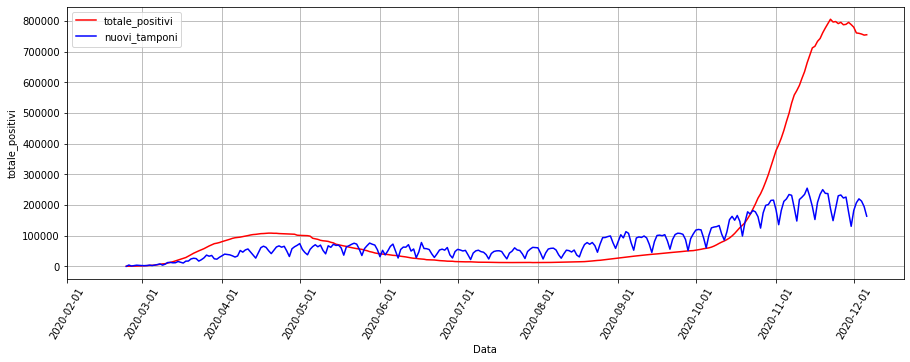

In [24]:
#x=pd.to_numeric(range(df.shape[0]))
x=data3
y=df[variabile]
z=df[variabile2]
plt.figure(figsize=(15,5))
plt.plot(x,y,color='red',label=variabile)
plt.plot(x,z,color='blue',label=variabile2)
plt.ylabel(variabile)
plt.xlabel("Data")
plt.xticks(np.arange('2020-02','2021-01', 1,dtype='datetime64[M]'),rotation=60)
plt.grid()
plt.legend()

In [25]:
df['nuovi_positivi']

0        221
1         93
2         78
3        250
4        238
       ...  
282    20709
283    23225
284    24099
285    21052
286    18887
Name: nuovi_positivi, Length: 287, dtype: int64

In [26]:
df['nuovi_tamponi']

0           0
1        4299
2         964
3        2427
4        3681
        ...  
282    207143
283    220047
284    212741
285    194984
286    163550
Name: nuovi_tamponi, Length: 287, dtype: int64

In [27]:
df['rapporto']=df['nuovi_positivi']/df['nuovi_tamponi']
df['rapporto']

0           inf
1      0.021633
2      0.080913
3      0.103008
4      0.064656
         ...   
282    0.099974
283    0.105546
284    0.113279
285    0.107968
286    0.115482
Name: rapporto, Length: 287, dtype: float64

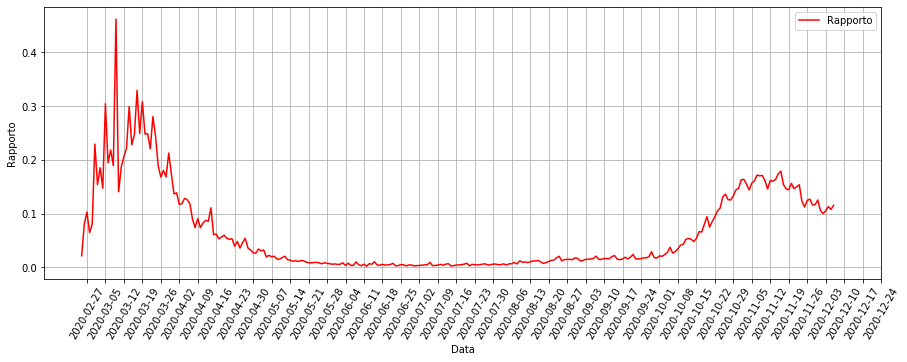

In [28]:
x=data3
y=df['rapporto']
plt.figure(figsize=(15,5))
plt.plot(x,y,color='red',label="Rapporto")
plt.ylabel("Rapporto")
plt.xlabel("Data")
plt.xticks(np.arange('2020-03','2021-01', 1,dtype='datetime64[W]'),rotation=60)
plt.grid()
plt.legend()

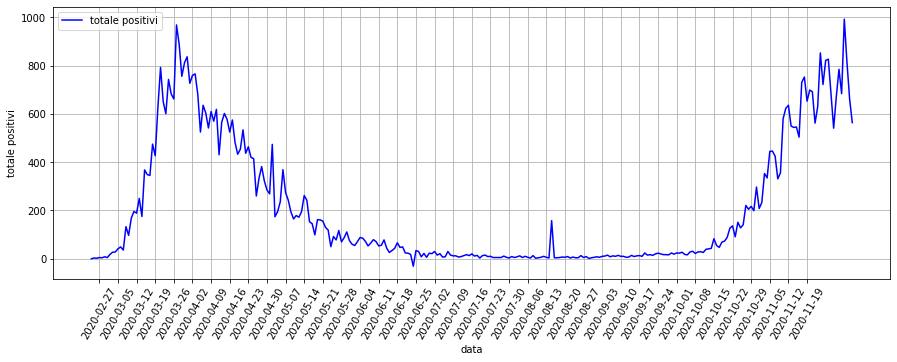

In [31]:
x=data3
y=df['nuovi_deceduti']
plt.figure(figsize=(15,5))
plt.plot(x,y,color='blue',label='totale positivi')
plt.xlabel('data')
plt.ylabel('totale positivi')
plt.xticks(np.arange('2020-03','2020-12',1,dtype='datetime64[W]'),rotation=60)
plt.grid()
plt.legend()